In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
combine = [train_df, test_df]

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_df 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- 변수 정보
    - Passengerld: 승객번호
    - Survived: 생존여부 (0: 사망, 1: 생존) 
    - Pclass: 배의 클래스(1>2>3) 
    - Name: 승객이름
    - Sex: 성별
    - Age: 승객 나이 
    - SibSp: 형제, 자매, 배우자의 수 
    - Parch: 부모, 자녀 수 
    - Ticket: 티켓번호 
    - Fare: 요금 
    - Cabin: 객실번호 
    - Embarked: 출발지 (C: 셰르부르, S: 사우샘프턴, Q: 퀸즈타운)
> 이때 test data에는 종속변수(Survived) 존재 X

### EDA

#### 1. 데이터 파악

In [7]:
# 열 확인
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
# 데이터 정보 확인 (타입, 행 및 열 갯수)
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- 변수 분류
    - Categorical(범주형): Survived, Sex, and Embarked. Ordinal: Pclass.
    - Continous(연속형): Age, Fare
    - Discrete(이산형): SibSp, Parch
> 7개의 변수는 integer or floats / 5개의 변수는 strings (object).

In [11]:
# 결측치 확인
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- train data -> Cabin > Age > Embarked 순으로 결측치 존재 

- test data -> Cabin > Age > Fare 순으로 결측지 존재

In [12]:
# Numerical 변수의 분포 파악
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- train data의 표본 샘플은 타이나닉호에 탑승한 실제 승객 수(2,224명)의 40%인 891명이다. 
- 표본 샘플의 생존율은 약 38%이다. 
- 대부분의 승객(75% 이상)은 부모나 자녀와 함께 탑승하지 않았다. 
- 지불 요금은 상당히 다양하게 나타나며, 512달러 만큼 높은 요금을 지불하는 경우는 거의 없었다.(1% 미만) 
- 65-80세 범위에 속하는 노인은 거의 없다. (1% 미만)

In [13]:
# Categorical 변수 파악 
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- 이름은 중복값이 존재하지 않는 고유값이다. 
- 승객 중 65%는 남성이었다. 
- 객실번호에 중복값이 다수인 것으로 보아, 여러명의 승객이 객실을 공유한 것으로 파악된다. 
- 대부분의 승객이 사우샘프턴에서 탑승했다. 
- 티겟번호 또한 중복 비율이 높다.(23%) 


- 티켓번호, 성함, 객실번호(cabin), PassengerId 열 제거 

#### [ 상관관계 ] 
- 각 변수가 생존여부와 얼마나 관련이 있는가? 상관관계 분석 

#### [ 주요 변수 ] 
1. 연령(Age) 변수가 생존 변수와 관련이 있는 지 파악하고자 함
2. 출발지(Embarked) 변수가 생존 또는 다른 변수와 관련이 있는 지 파악하고자 함 

#### [ 데이터 수정 ] 
1. 티켓번호(Ticket) 변수는 중복 비율이 높기 때문에 분석에서 삭제될 수 있으며, 해당 변수와 생존 여부 사이에는 상관 관계가 없을 것으로 판단됨
2. 객실번호(Cabin) 변수는 null값을 다수 포함하고 있어 삭제될 수 있음
3. 이름(Name) 뱐수는 생존에 직접적으로 기여하지 않을 수 있으므로 삭제될 수 있음

#### [ 새로운 컬럼 생성 ] 
1. SibSp + Parch = Family라는 새로운 변수 생성 
2. 이름(Name) 변수에서 호칭만을 추출하여 Title이라는 새로운 변수 생성 
3. 연령(Age)를 범주화하여 Age bands라는 새로운 변수 새성

#### [ 데이터 분석에 따른 가정 ]
1. 여성 생존률이 더 높다. 
2. 아이 생존률이 더 높다. (몇 세 이하를 아이로 볼 것인지?) 
3. Pclass=1인 고객의 생존률이 더 높다. 


#### 2. 가설체크
- Pclass, Sex, SibSp and Parch과 Survived간의 관계 파악

In [16]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- Pclass 등급이 좋을 수록 생존 확률이 올라간다. 즉, Pclass=1과 Survived 간에 유의한 상관관계 존재 
- 여성의 생존율이 74%로 남성보다 압도적으로 높음
- SibSp과 Parch 변수는 생존과 크게 상관관계가 없어 보이므로, 데이터 조합(Data set)을 통해 생존여부와 관련이 있는 지 다시 검토 필요

#### 3. visualizing

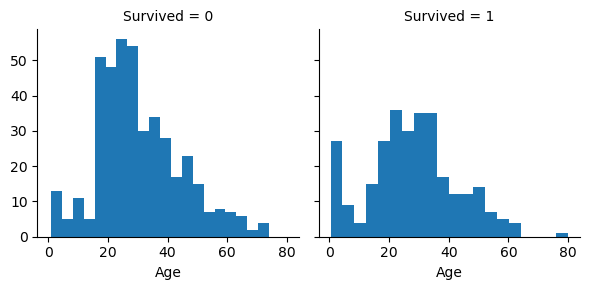

In [19]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


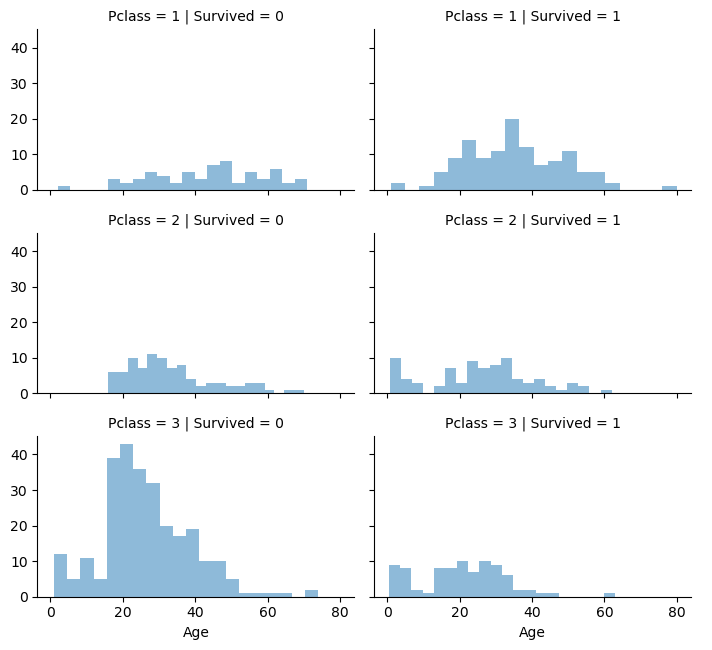

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


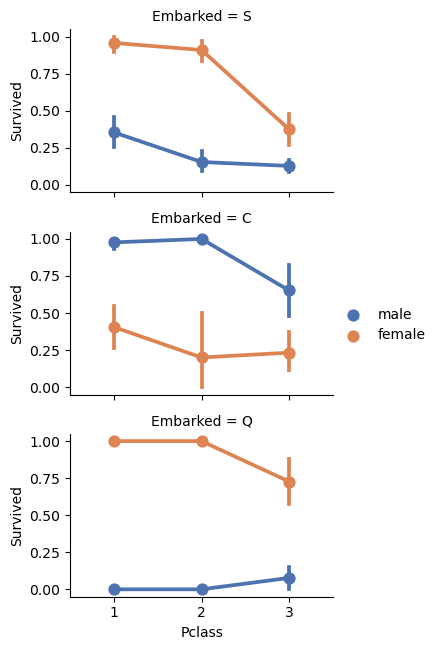

In [21]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### 데이터 전처리